### Q0: Sampling and Distribution

You are studying the population of a specific type of marine algae in different locations. Assume the algal density is normally distributed. You take samples from two locations (Location A and Location B) to compare the algae populations. Generate synthetic data to represent the algal density (individuals per square meter) at these two locations. Assume a mean density of 200 and 220 individuals/m^2 with a common standard deviation of 20 individuals/m^2 for both locations, with 50 samples from each location.


In [3]:
Location_A <- rnorm(50, mean = 200, sd = 20)

In [4]:
Location_A

[1] 218.4926 225.7120 241.1673 195.6110 191.7092 202.0059 196.9968 155.4716
 [9] 198.4535 202.9989 182.8734 197.1980 235.5620 192.6893 234.2912 227.2091
[17] 221.1231 200.1860 234.3034 184.1742 201.0574 167.1748 197.5721 192.3786
[25] 174.8083 174.0809 219.4371 183.5451 191.6766 213.4881 201.5513 183.4858
[33] 214.9195 217.5345 211.9429 235.1013 207.8586 238.1810 201.6867 204.8986
[41] 184.7089 238.7974 210.3074 206.6664 195.2925 196.8288 210.4268 190.4682
[49] 215.4942 170.2395

In [5]:
Location_B <- rnorm(50, mean = 200, sd = 20)

In [6]:
Location_B

[1] 197.1479 191.1536 226.2594 184.1848 211.3117 216.5810 201.6864 189.8631
 [9] 175.7621 187.0677 173.2598 207.4530 181.7681 211.8895 216.1258 215.5137
[17] 198.3464 198.7000 175.1153 178.8275 227.2871 232.8754 171.7660 215.2101
[25] 209.0940 199.6078 169.3252 176.8330 221.3014 182.6805 235.5630 195.3312
[33] 233.6678 229.4073 203.0206 202.3613 200.2855 203.5699 210.8248 195.1594
[41] 199.8171 224.0412 181.4417 232.2130 171.3070 212.2124 246.1266 244.8387
[49] 204.9528 196.3809

In [7]:
df <- data.frame(Location_A, Location_B)

### Q1: Data Cleaning

Check your dataset for any outliers. 


In [9]:
summary(df)

   Location_A      Location_B   
 Min.   :155.5   Min.   :169.3  
 1st Qu.:191.9   1st Qu.:187.8  
 Median :201.6   Median :202.0  
 Mean   :203.8   Mean   :203.3  
 3rd Qu.:217.0   3rd Qu.:216.0  
 Max.   :241.2   Max.   :246.1  

In [10]:
library(ggplot2)

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”


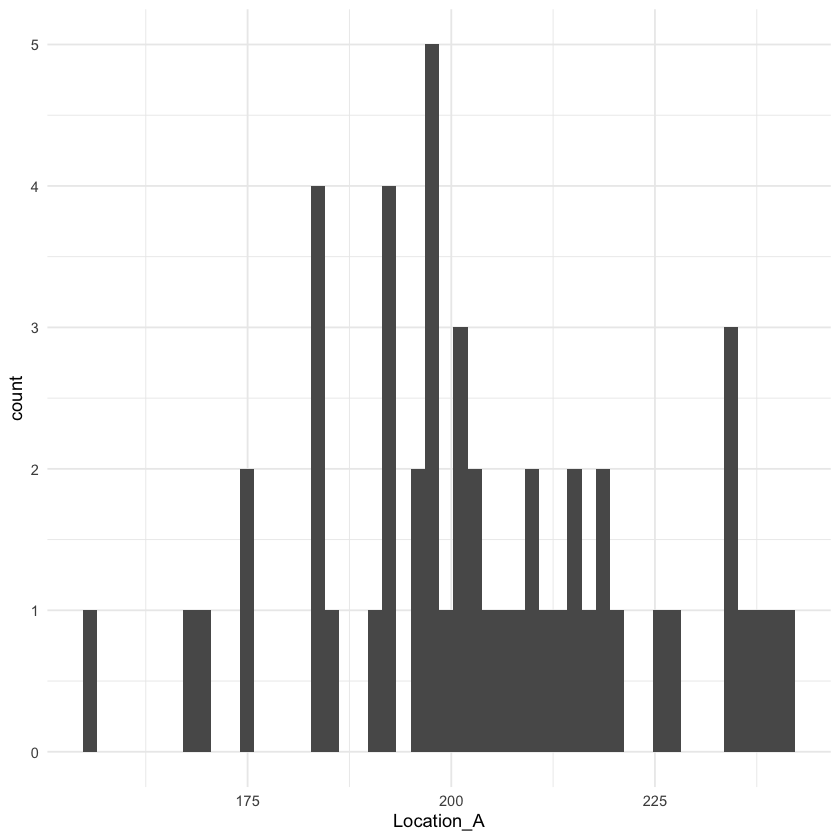

In [16]:
ggplot(df, aes(x=Location_A)) +
geom_histogram(bins=50) + 
theme_minimal()

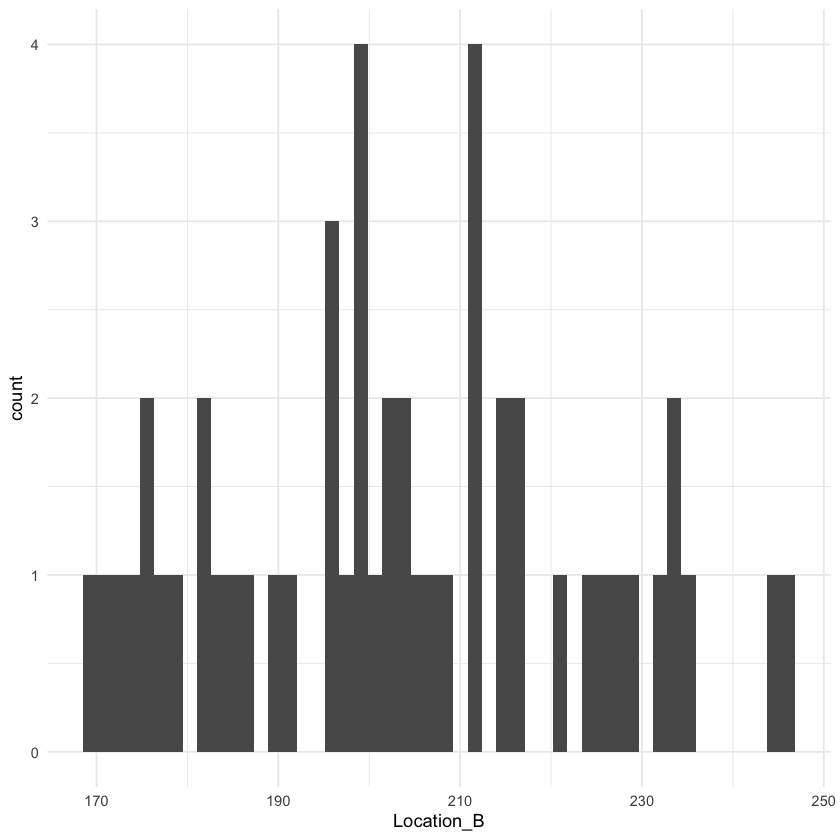

In [17]:
ggplot(df, aes(x=Location_B)) +
geom_histogram(bins=50) + 
theme_minimal()

In [31]:
A_min = 200 - (2*20)

In [32]:
A_max = 200 + (2*20)

In [33]:
Location_A[which(Location_A < A_min | Location_A > A_max)]

[1] 241.1673 155.4716

In [34]:
Location_B[which(Location_B < A_min | Location_B > A_max)]

[1] 246.1266 244.8387

### Q2: Visualization and Kernel Density Estimation (KDE)

Plot a Kernel Density Estimation (geom_density plot) to visualize the distribution of algal densities at both locations. 




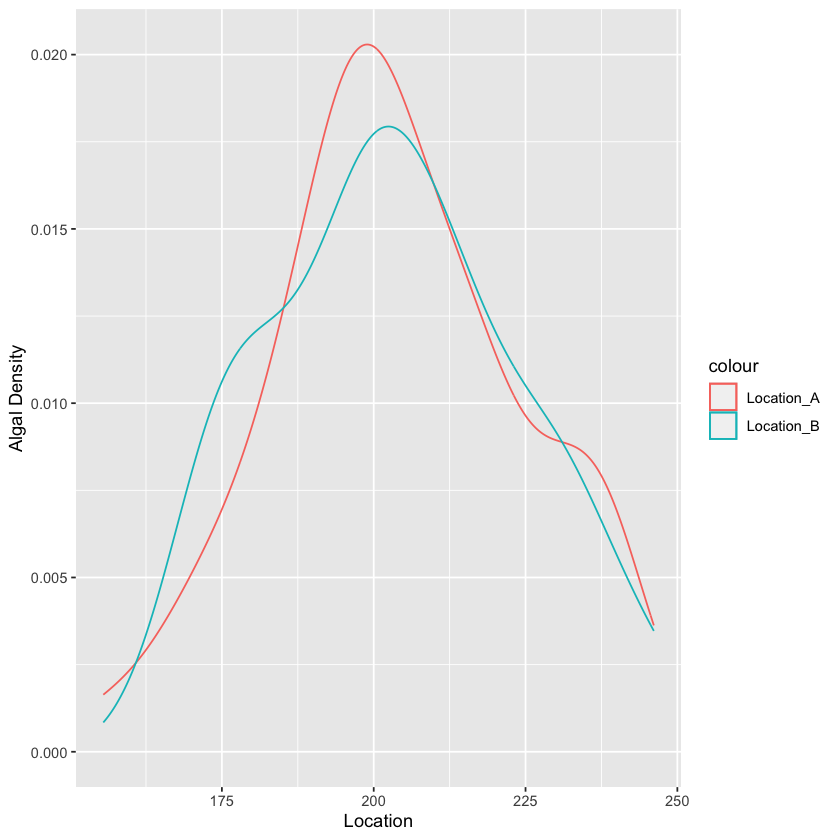

In [49]:
ggplot() +
       geom_density(aes(x = Location_A, color = "Location_A")) +
                    geom_density(aes(x = Location_B, color = "Location_B")) +
                    xlab("Location") +
                    ylab("Algal Density")
                    
    
       

### Q3: Binomial Distribution
Suppose in a new survey, at each location, you take 10 random samples and in each sample, you identify whether a particular species of marine algae is present or not. Assume the probability of finding this species in a sample is 0.7 at Location A and 0.5 at Location B.

Simulate this scenario using a binomial distribution, and compare the probability of finding the species in at least 7 out of 10 samples at both locations.

In [8]:
Location_a <- dbinom(7, 10, 0.7)

In [9]:
Location_a

[1] 0.2668279

In [10]:
Location_b <- dbinom(7, 10, 0.5)

In [11]:
Location_b

[1] 0.1171875

### Q4: Poisson Distribution
Imagine a scenario where you are studying the occurrences of a particular rare marine event, such as the sighting of a rare marine species, over a set period at a specified location. Assume the average rate of occurrence is 3 per month.

Utilize a Poisson distribution to calculate the probability of observing exactly 5 occurrences in a month, and the probability of observing 3 or fewer occurrences in a month.

In [54]:
dpois(5, lambda = 3)

[1] 0.1008188

In [55]:
ppois(3, lambda = 3)

[1] 0.6472319

### Q5: 
consider the following two lists. 

In [2]:
list1 <- c(44.40, 47.70, 65.59, 50.71, 51.29, 67.15, 54.61, 37.35, 43.13, 45.54, 62.24, 53.60, 54.01, 51.11, 
           44.44, 67.87, 54.98, 30.33, 57.01, 45.27, 39.32, 47.82, 39.74, 42.71, 43.75, 33.13, 58.38, 51.53, 
           38.62, 62.54, 54.26, 47.05, 58.95, 58.78, 58.22, 56.89, 55.54, 49.38, 46.94, 46.20, 43.05, 47.92, 
           37.35, 71.69, 62.08, 38.77, 45.97, 45.33, 57.80, 49.17, 52.53, 49.71, 49.57, 63.69, 47.74, 65.16, 
           34.51, 55.85, 51.24, 52.16, 53.80, 44.98, 46.67, 39.81, 39.28, 53.04, 54.48, 50.53, 59.22, 70.50, 
           45.09, 26.91, 60.06, 42.91, 43.12, 60.26, 47.15, 37.79, 51.81, 48.61, 50.06, 53.85, 46.29, 56.44, 
           47.80, 53.32, 60.97, 54.35, 46.74, 61.49, 59.94, 55.48, 52.39, 43.72, 63.61, 44.00, 71.87, 65.33, 
           47.64, 39.74)

list2 <- c(44.34, 48.85, 41.30, 39.79, 30.73, 44.32, 33.23, 19.98, 39.30, 58.78, 36.37, 54.12, 20.73, 44.17, 
           52.79, 49.52, 46.59, 35.39, 32.25, 29.64, 46.76, 30.79, 37.64, 41.16, 72.66, 35.22, 48.53, 46.17, 
           30.57, 43.93, 66.67, 51.77, 45.62, 38.66, 14.20, 61.97, 23.09, 56.10, 73.64, 23.34, 55.53, 41.07, 
           21.42, 22.28, 20.98, 37.04, 23.07, 55.32, 76.50, 25.69, 56.82, 56.54, 49.98, 29.87, 43.21, 40.79, 
           53.44, 39.41, 59.65, 39.38, 60.79, 29.26, 26.10, 93.62, 38.75, 49.47, 54.55, 37.74, 52.75, 50.53, 
           41.77, 45.98, 44.49, 76.93, 33.88, 28.56, 45.57, 49.66, 51.55, 38.12, 29.05, 63.95, 39.76, 32.02, 
           41.46, 42.04, 61.65, 46.27, 56.31, 37.51, 48.22, 40.13, 46.42, 31.57, 25.34, 74.96, 54.01, 26.23, 
           35.83, 27.22)


In [3]:
ks.test(list1, list2)

Warning message in ks.test.default(list1, list2):
“p-value will be approximate in the presence of ties”



	Asymptotic two-sample Kolmogorov-Smirnov test

data:  list1 and list2
D = 0.37, p-value = 2.267e-06
alternative hypothesis: two-sided


These list were generated using the following code

set.seed(123)  # Setting a seed for reproducibility
list1 <- round(rnorm(100, mean = 50, sd = 10), 2)  # Generating 100 values from a normal distribution
list2 <- round(rnorm(100, mean = 45, sd = 15), 2)  # Generating 100 values from another normal distribution

Compare the distributions of these two lists to determine if they originate from the same distribution or from different distributions.

1. Use geom_density to create a density plot for each list on the same graph. Use different colors to distinguish between the two lists:

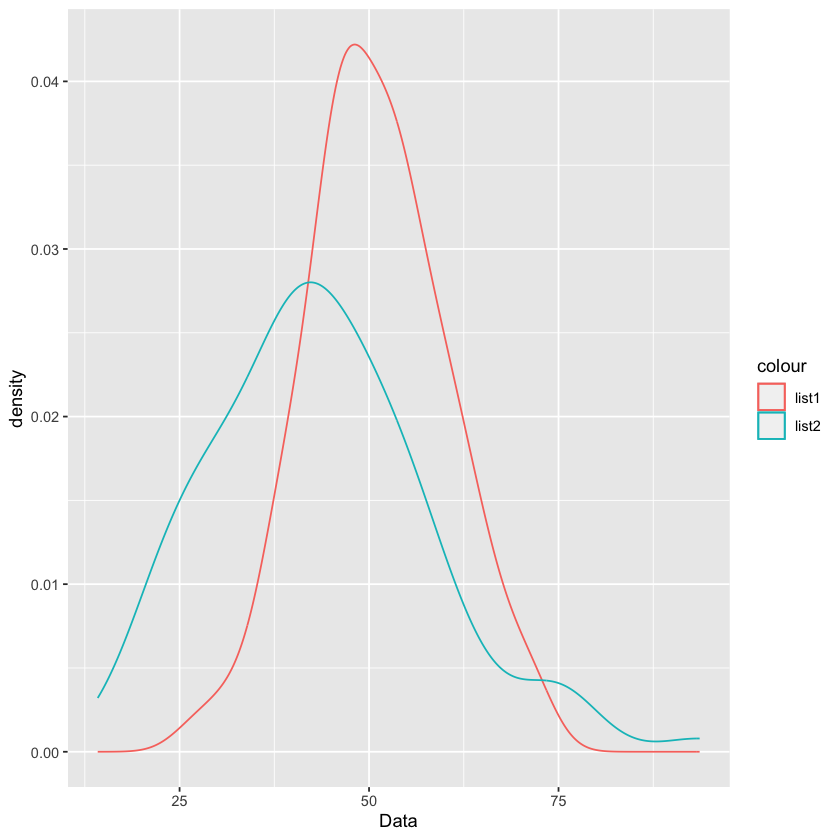

In [68]:
ggplot() +
       geom_density(aes(x = list1, color = "list1")) +
                    geom_density(aes(x = list2, color = "list2")) + 
                    xlab("Data")
                   
            


###  It seems like both data come from the same distribution since they have a similar pattern and deviation but different in mean.


Examine the plot you have generated. Do you think list1 and list2 come from the same distribution or different distributions? Why?
Write down your observations and reasoning.

* Write your answer below
